In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error
from seaborn import regplot
import scipy.stats as stats

### Load Data

In [36]:
cases = pd.read_csv('./data/covid_cases_weekly', index_col=0)
deaths = pd.read_csv('./data/covid_deaths_weekly', index_col=0)

# First task: create linear and non-linear models to predict the number of new cases and deaths in Florida

In [37]:
state = 'FL'

In [38]:
florida_cases = cases[cases['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_deaths = deaths[deaths['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_cases = florida_cases.iloc[1:]
florida_deaths = florida_deaths.iloc[1:]

In [39]:
florida_case_sums = florida_cases[florida_cases.columns[3:]].sum()
florida_death_sums = florida_deaths[florida_deaths.columns[3:]].sum()
florida_new_cases = florida_case_sums.diff()[1:]
florida_new_deaths = florida_death_sums.diff()[1:]

### Linear Model

In [40]:
x = np.arange(len(florida_new_cases)) * 7
cases_linear = LinearRegression()
deaths_linear = LinearRegression()
reshape = lambda a: a.copy().reshape(-1, 1)
cases_linear.fit(reshape(x), florida_new_cases)
deaths_linear.fit(reshape(x), florida_new_deaths)

LinearRegression()

### Get Predictions and plot with 1 week prediction into the future

In [41]:
x_ext = np.arange(len(florida_new_cases) + 1) * 7
cases_pred_linear = cases_linear.predict(reshape(x))
deaths_pred_linear = deaths_linear.predict(reshape(x))

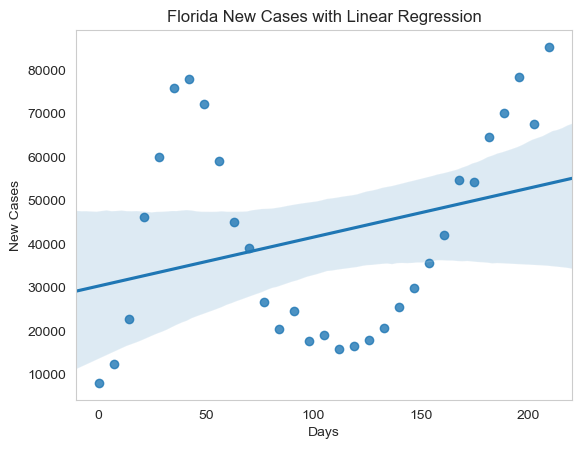

In [42]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, label='Cases', truncate=False)
ax.set_title('Florida New Cases with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

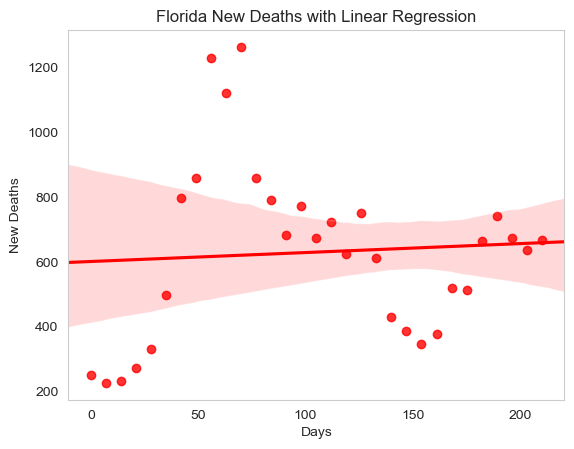

In [43]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, label='Deaths', truncate=False, color='red')
ax.set_title('Florida New Deaths with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Non-Linear Model - Polynomial Degree 2

In [44]:
cases_poly2 = polyfit(x, florida_new_cases, 2)
deaths_poly2 = polyfit(x, florida_new_deaths, 2)

In [45]:
cases_pred_poly2 = polyval(x, cases_poly2)
deaths_pred_poly2 = polyval(x, deaths_poly2)

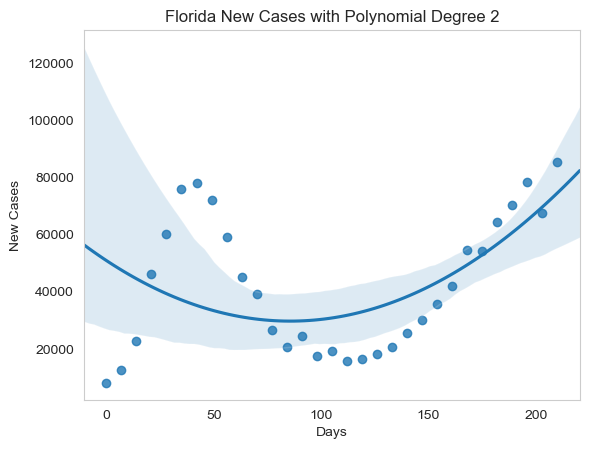

In [46]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, order=2, label='Trendline', truncate=False)
ax.set_title('Florida New Cases with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

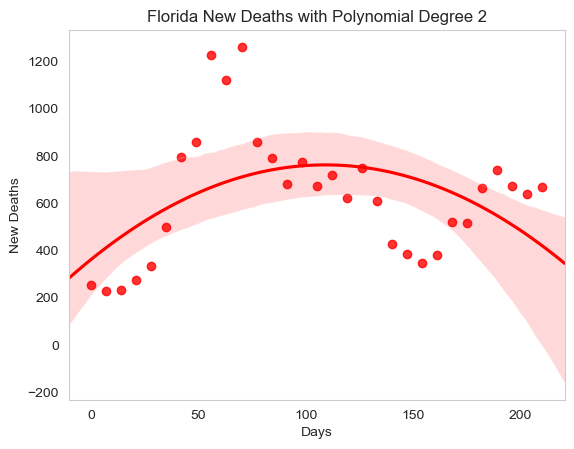

In [47]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, order=2, label='Trendline', truncate=False, color='red')
ax.set_title('Florida New Deaths with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Non-Linear Model - Polynomial Degree 3

In [48]:
cases_poly3 = polyfit(x, florida_new_cases, 3)
deaths_poly3 = polyfit(x, florida_new_deaths, 3)

In [49]:
cases_pred_poly3 = polyval(x, cases_poly3)
deaths_pred_poly3 = polyval(x, deaths_poly3)

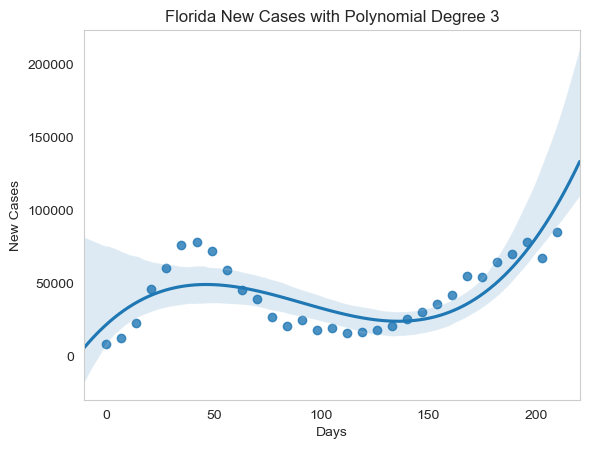

In [50]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, order=3, label='Trendline', truncate=False)
ax.set_title('Florida New Cases with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

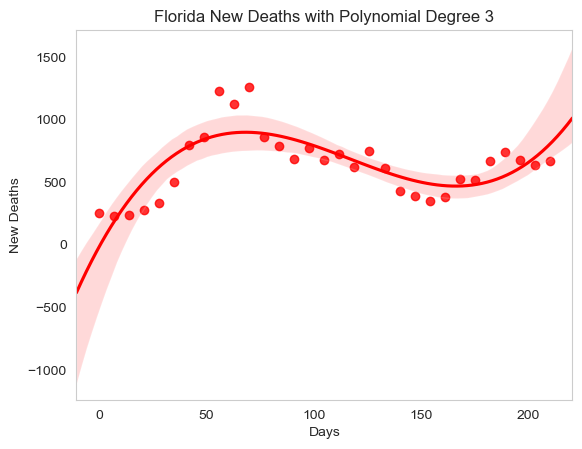

In [51]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, order=3, label='Trendline', truncate=False, color='red')
ax.set_title('Florida New Deaths with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Root Mean Squared Error of Models

In [52]:
# Linear
linear_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_linear)
linear_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_linear)
# Polynomial degree 2
poly2_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly2)
poly2_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly2)
# Polynomial degree 3
poly3_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly3)
poly3_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly3)

data = {
    'Model': ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3'],
    'Cases RMSE': [linear_cases_rmse, poly2_cases_rmse, poly3_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, poly2_deaths_rmse, poly3_deaths_rmse]
}

rmse_df = pd.DataFrame(data).set_index('Model')

rmse_df

,Cases RMSE,Deaths RMSE
Model,,
Linear,22187.631338,264.658561
Polynomial Degree 2,19740.446819,237.114555
Polynomial Degree 3,14433.191037,159.315881


# Task 2: Find the top 5 counties in Florida with the highest risk of infection and analyze the trend of cases in those counties

I choose to define the risk of infection as the percentage of the population that has been infected. This is calculated by dividing the cumulative number of infected people by the population of the county.

In [53]:
florida_cases['infected%'] = florida_cases.iloc[:, -1] / florida_cases['population'] * 100

In [54]:
top_5_counties = florida_cases.sort_values(by='infected%', ascending=False).set_index('County Name').drop(columns=['countyFIPS'])
top_5_counties = top_5_counties.head(5)
top_5_counties

,population,2020-06-01 00:00:00,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,...,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00,infected%
County Name,,,,,,,,,,,,,,,,,,,,,
Lafayette County,8422,8,10,13,20,31,40,56,73,83,...,1287,1290,1304,1323,1365,1389,1406,1414,1436,17.050582
Miami-Dade County,2716940,18139,19756,22197,26239,35222,48992,67713,87035,107315,...,194879,203654,216442,229618,245064,260138,276414,290363,305734,11.252880
Jackson County,46414,256,309,320,338,359,411,632,857,1270,...,3349,3535,3716,3883,4015,4151,4369,4502,4754,10.242599
Gulf County,13639,1,7,9,11,22,54,98,178,249,...,991,1021,1043,1061,1112,1144,1215,1273,1359,9.964074
Union County,15237,32,38,38,42,61,89,114,142,206,...,1180,1194,1210,1229,1261,1306,1368,1416,1480,9.713198


In [55]:
# log normalize cases per 10,000 based on population
top_5_counties_normalized = top_5_counties.copy()[top_5_counties.columns[1:-1]].div(top_5_counties['population'], axis=0) * 10000
top_5_counties_normalized = np.log1p(top_5_counties_normalized)
top_5_counties_new = top_5_counties_normalized.diff(axis=1)
top_5_counties_new = top_5_counties_new.dropna(axis=1)
top_5_counties_new

,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,2020-08-03 00:00:00,2020-08-10 00:00:00,...,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00
County Name,,,,,,,,,,,,,,,,,,,,,
Lafayette County,0.203910,0.244276,0.409258,0.423813,0.248923,0.330563,0.261651,0.127006,0.305877,0.268073,...,0.004699,0.006231,0.002327,0.010787,0.014456,0.031233,0.017419,0.012157,0.005670,0.015430
Miami-Dade County,0.084184,0.115007,0.165425,0.291807,0.327832,0.322095,0.250145,0.208870,0.141304,0.077452,...,0.028231,0.037177,0.043984,0.060821,0.059023,0.065028,0.059629,0.060626,0.049185,0.051537
Jackson County,0.185105,0.034471,0.053963,0.059484,0.133655,0.426384,0.302633,0.391581,0.241390,0.158662,...,0.020707,0.055797,0.053979,0.049871,0.043907,0.033390,0.033274,0.051129,0.029956,0.054410
Gulf County,1.263612,0.214404,0.176452,0.636411,0.862736,0.584861,0.590628,0.333499,0.446722,0.523153,...,0.024266,0.033819,0.029783,0.021290,0.017089,0.046889,0.028336,0.060144,0.046581,0.065305
Union County,0.164648,0.000000,0.096405,0.362240,0.370066,0.243864,0.217024,0.368745,0.087604,0.505472,...,0.026375,0.024851,0.011779,0.013294,0.015561,0.025673,0.035022,0.046328,0.034448,0.044160


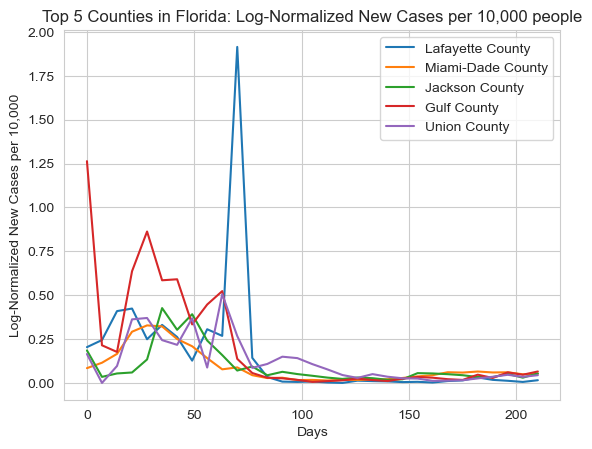

In [56]:
# first view the log-normalized cases per 10,000 people
plt.plot(x, top_5_counties_new.T)
plt.legend(top_5_counties.index)
plt.title('Top 5 Counties in Florida: Log-Normalized New Cases per 10,000 people')
plt.xlabel('Days')
plt.ylabel('Log-Normalized New Cases per 10,000')
plt.show()

### Polynomial Degree 3 Regression to Analyze Trends in Top 5 Counties

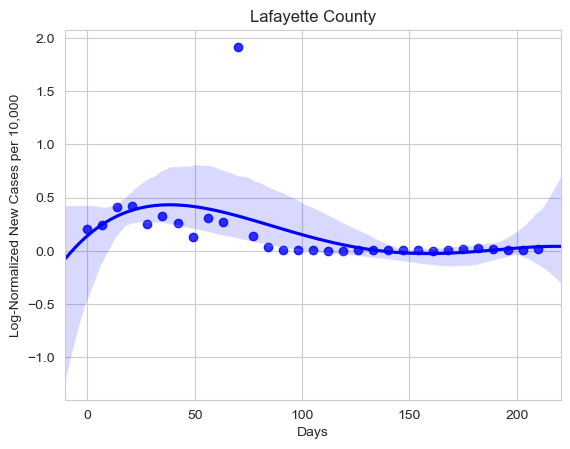

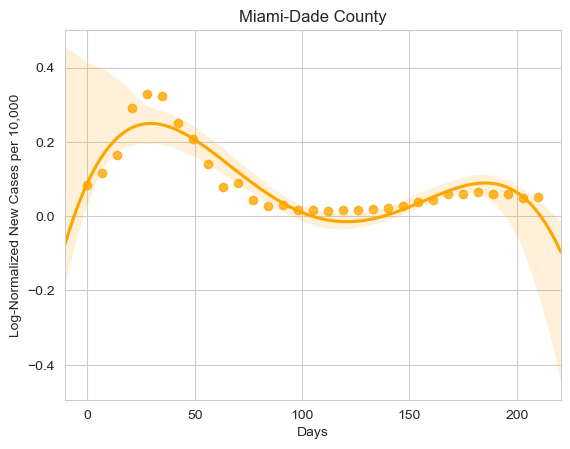

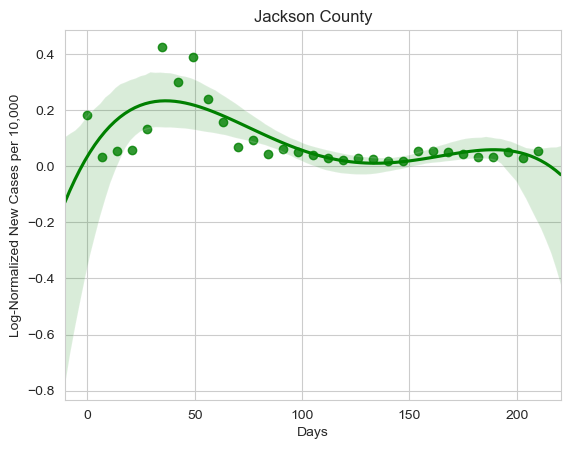

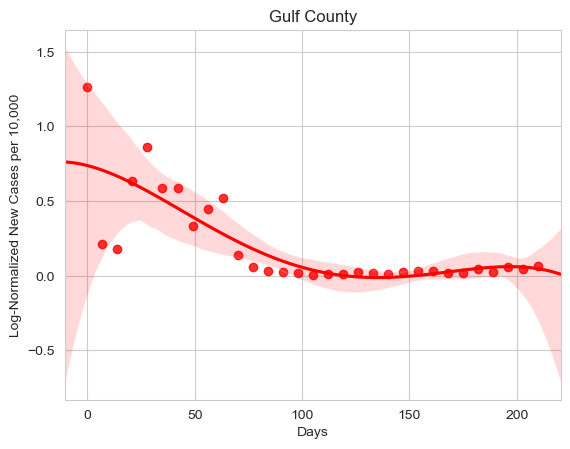

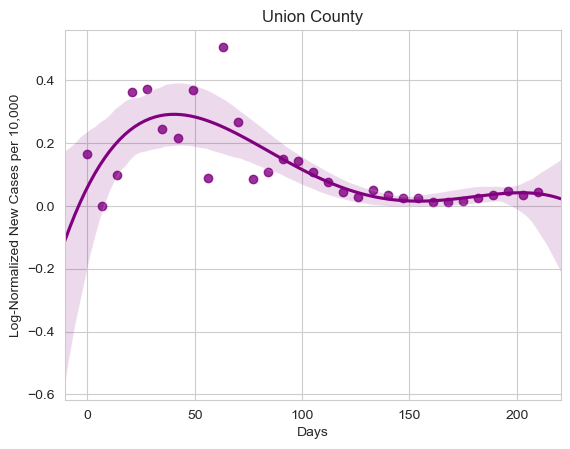

In [57]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
for county, color in zip(top_5_counties_new.index, colors):
    plt.figure()
    y = top_5_counties_new.loc[county]
    regplot(y=y, x=x, order=4, label='Trendline', truncate=False, color=color)
    plt.title(f'{county}')
    plt.xlabel('Days')
    plt.ylabel('Log-Normalized New Cases per 10,000')
    plt.show()

As we can see in the above diagram, each county follows a relatively similar trend. However, there a few counties, such as Miami-Dade, that had a spike of cases around 50 days into the time period. This corresponds roughly with the beginning of Autumn, which could be a factor in the increase in cases. However, given the climate in Florida, it is unlikely that the weather had a significant impact on the spread of the virus. Most of the counties have a downward trend in the number of new cases near the end of the time period, which is a positive sign.

# Task 3: Perform hypothesis testing between election result data and COVID-19 cases in Florida

In [58]:
election = pd.read_csv('./data/president_county_candidate.csv')
florida_election = election[election['state'] == 'Florida']
fl_election_clean = florida_election.drop(columns=['state']).set_index('county')

In [59]:
# Create a DataFrame with lots of useful information for hypothesis testing
vote_info = pd.DataFrame()
vote_info['total_votes'] = fl_election_clean.groupby('county')['total_votes'].sum()
vote_info['dem_votes'] = fl_election_clean[fl_election_clean['party'] == 'DEM'].groupby('county')['total_votes'].sum()
vote_info['rep_votes'] = fl_election_clean[fl_election_clean['party'] == 'REP'].groupby('county')['total_votes'].sum()
vote_info['dem_prop'] = vote_info['dem_votes'] / vote_info['total_votes'] * 100
vote_info['rep_prop'] = vote_info['rep_votes'] / vote_info['total_votes'] * 100
vote_info['population'] = florida_cases.set_index('County Name')['population']
vote_info['turnout'] = vote_info['total_votes'] / vote_info['population'] * 100

In [60]:
# Join the vote information with the COVID-19 cases
just_cases = florida_cases.set_index('County Name').drop(columns=['countyFIPS', 'population'])
hypothesis = vote_info.join(just_cases, how='inner')

### Hypothesis 1: Counties with a higher proportion of votes for the Democratic candidate have a lower number of COVID-19 cases

### First perform 2 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in Dem-leaning counties is the same as the number of COVID-19 cases in Rep-leaning counties
- Alternative Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is different from the number of COVID-19 cases in Rep-leaning counties

In [61]:
dem_cases_2_sided = hypothesis[hypothesis['dem_prop'] > 50].iloc[:, -1]
rep_cases_2_sided = hypothesis[hypothesis['rep_prop'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(dem_cases_2_sided, rep_cases_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.8373095955695355
Reject Null Hypothesis: False


We accept the Null Hypothesis that the number of COVID-19 cases in Dem-leaning counties is the same as the number of COVID-19 cases in Rep-leaning counties. This suggests that there is no significant difference in the number of COVID-19 cases between the two groups.

### Next, perform 1 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is less than or equal to the number of COVID-19 cases in Rep-leaning counties
- Alternative Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is greater than the number of COVID-19 cases in Rep-leaning counties

In [62]:
# perform 1 tail 2 sample t-test
dem_cases_1_sided = hypothesis[hypothesis['dem_prop'] > 50].iloc[:, -1]
rep_cases_1_sided = hypothesis[hypothesis['rep_prop'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(dem_cases_1_sided, rep_cases_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.4186547977847678
Reject Null Hypothesis: False


We accept the Null Hypothesis that the number of COVID-19 cases in Dem-leaning counties is less than or equal to the number of COVID-19 cases in Rep-leaning counties. This suggests that there is no significant difference in the number of COVID-19 cases between the two groups.

### Hypothesis 2: Counties with a higher voter turnout have a higher number of COVID-19 cases

### First perform 2 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in high-turnout counties is the same as the number of COVID-19 cases in low-turnout counties
- Alternative Hypothesis: The number of COVID-19 cases in high-turnout counties is different from the number of COVID-19 cases in low-turnout counties

In [63]:
high_turnout_cases_2_sided = hypothesis[hypothesis['turnout'] > 50].iloc[:, -1]
low_turnout_cases_2_sided = hypothesis[hypothesis['turnout'] <= 50].iloc[:, -1]
_, p_val = stats.ttest_ind(high_turnout_cases_2_sided, low_turnout_cases_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 3.43710065902993e-05
Reject Null Hypothesis: True


We reject the Null Hypothesis that the number of COVID-19 cases in high-turnout counties is the same as the number of COVID-19 cases in low-turnout counties. This suggests that there is a significant difference in the number of COVID-19 cases between the two groups.

### Next, perform 1 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in high-turnout counties is less than or equal to the number of COVID-19 cases in low-turnout counties
- Alternative Hypothesis: The number of COVID-19 cases in high-turnout counties is greater than the number of COVID-19 cases in low-turnout counties

In [64]:
high_turnout_cases_1_sided = hypothesis[hypothesis['turnout'] > 50].iloc[:, -1]
low_turnout_cases_1_sided = hypothesis[hypothesis['turnout'] <= 50].iloc[:, -1]
_, p_val = stats.ttest_ind(high_turnout_cases_1_sided, low_turnout_cases_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.9999828144967048
Reject Null Hypothesis: False


We accept the Null Hypothesis that the number of COVID-19 cases in high-turnout counties is less than or equal to the number of COVID-19 cases in low-turnout counties. Considering the results of the previous hypothesis, this suggests that the number of COVID-19 cases is lower in high-turnout counties than in low-turnout counties.

### Hypothesis 3: Counties with a higher proportion of votes for the Democratic candidate have a lower infection rate
- Null Hypothesis: The infection rate in Dem-leaning counties is the same as the infection rate in Rep-leaning counties
- Alternative Hypothesis: The infection rate in counties in Dem-leaning counties is different from the infection rate in Rep-leaning counties

### First perform 2 sided 2 sample T-test

In [65]:
dem_infection_2_sided = hypothesis[hypothesis['dem_prop'] > 50]['infected%']
rep_infection_2_sided = hypothesis[hypothesis['rep_prop'] > 50]['infected%']
_, p_val = stats.ttest_ind(dem_infection_2_sided, rep_infection_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.8373095955695355
Reject Null Hypothesis: False


We accept the Null Hypothesis that the infection rate in Dem-leaning counties is the same as the infection rate in Rep-leaning counties. This suggests that there is a no significant difference in the infection rate between the two groups.

### Next, perform 1 sided 2 sample T-test

In [66]:
dem_infection_1_sided = hypothesis[hypothesis['dem_prop'] > 50]['infected%']
rep_infection_1_sided = hypothesis[hypothesis['rep_prop'] > 50]['infected%']
_, p_val = stats.ttest_ind(dem_infection_1_sided, rep_infection_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.4186547977847678
Reject Null Hypothesis: False


We accept the Null Hypothesis that the infection rate in Dem-leaning counties is less than or equal to the infection rate in Rep-leaning counties. This suggests that there is no significant difference in the infection rate between the two groups.